# Introduction

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import math
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [45]:
df=pd.read_csv("/content/drive/MyDrive/Education/BAU Big Data Analytics and Management/BAU BDA Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
print(df.isnull().sum()*100/df.shape[0])
print(df.info())

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64 

In [48]:
for i in df.columns:
   print(i,"   ",df[i].unique())

customerID     ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender     ['Female' 'Male']
SeniorCitizen     [0 1]
Partner     ['Yes' 'No']
Dependents     ['No' 'Yes']
tenure     [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService     ['No' 'Yes']
MultipleLines     ['No phone service' 'No' 'Yes']
InternetService     ['DSL' 'Fiber optic' 'No']
OnlineSecurity     ['No' 'Yes' 'No internet service']
OnlineBackup     ['Yes' 'No' 'No internet service']
DeviceProtection     ['No' 'Yes' 'No internet service']
TechSupport     ['No' 'Yes' 'No internet service']
StreamingTV     ['No' 'Yes' 'No internet service']
StreamingMovies     ['No' 'Yes' 'No internet service']
Contract     ['Month-to-month' 'One year' 'Two year']
PaperlessBilling     ['Yes' 'No']
PaymentMethod     ['Elect

In [49]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
df.dropna(inplace = True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [52]:
y=df["Churn"]

# Exploratory Data Analysis & Visualization

In [53]:
plt.style.use("fivethirtyeight")

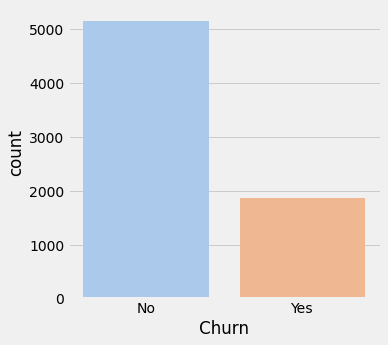

In [54]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df["Churn"], palette="pastel")
plt.show()

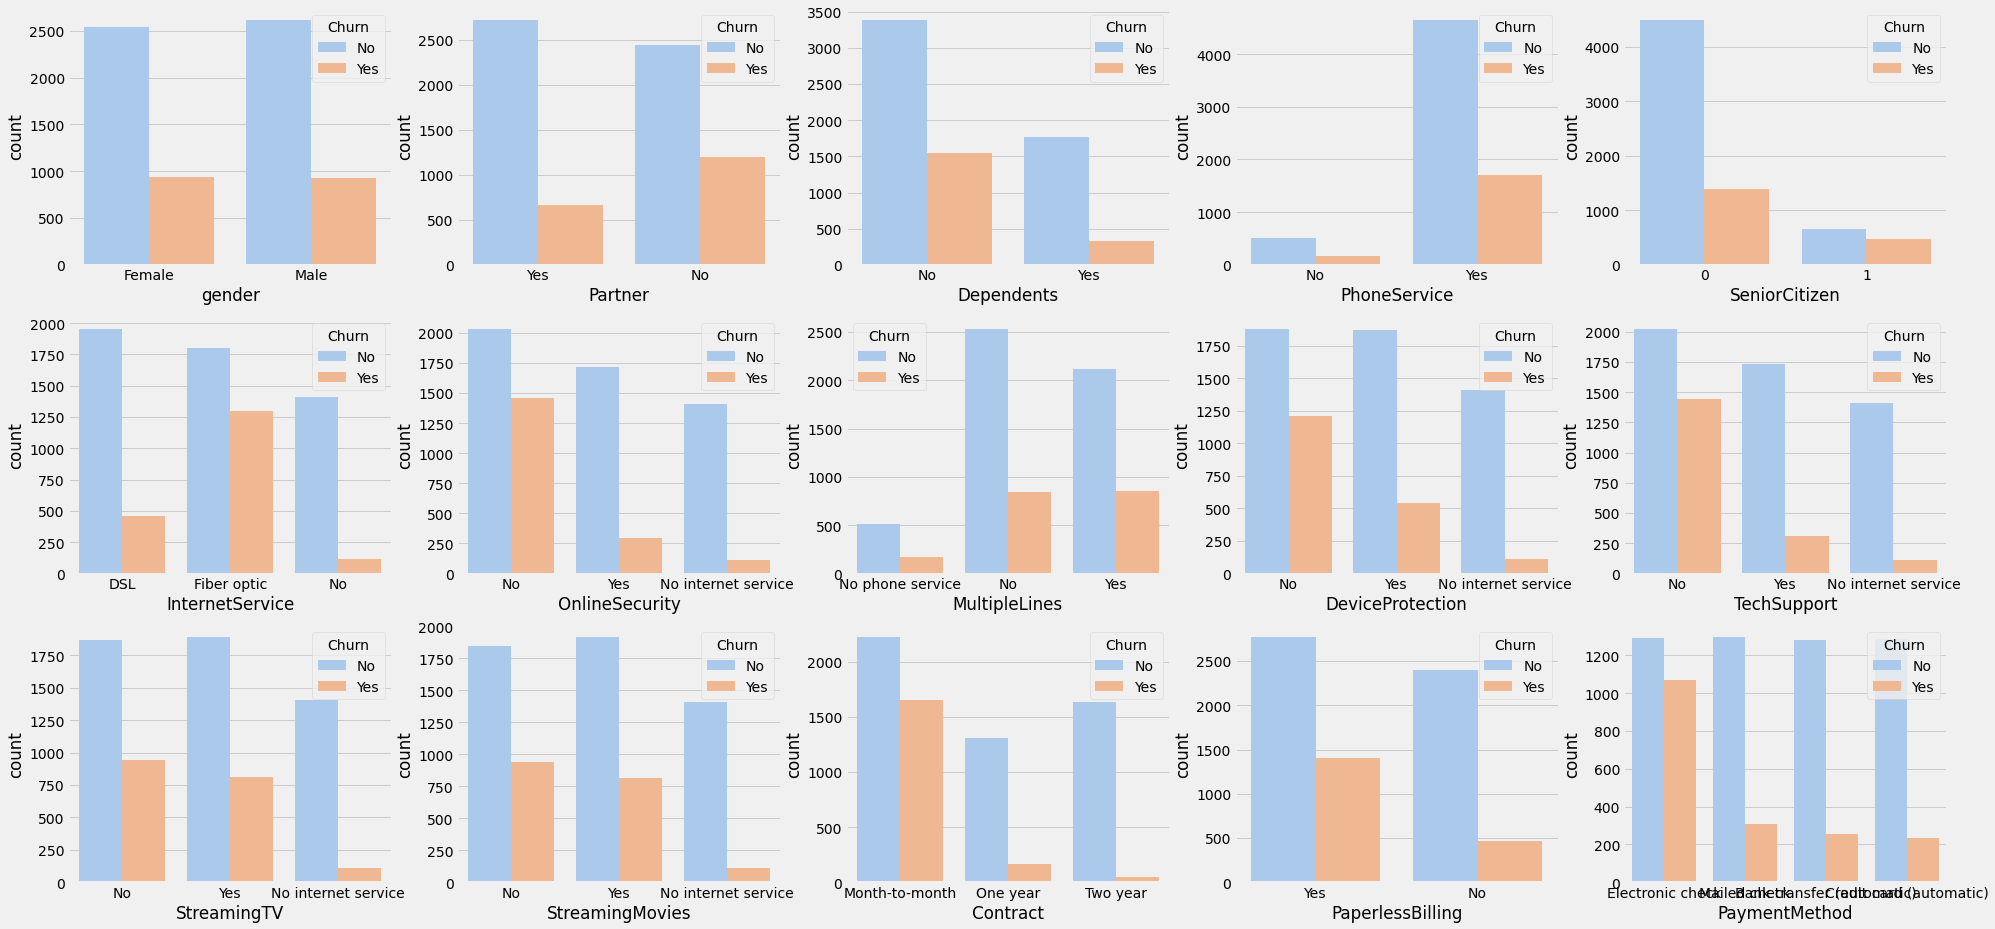

In [55]:
fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (30,15))
sns.countplot(x = "gender",hue=y, data = df,palette="pastel", ax=axes[0][0])
sns.countplot(x = "Partner",hue=y, data = df,palette="pastel", ax=axes[0][1])
sns.countplot(x = "Dependents",hue=y, data = df,palette="pastel", ax=axes[0][2])
sns.countplot(x = "PhoneService",hue=y, data = df,palette="pastel", ax=axes[0][3])
sns.countplot(x = "SeniorCitizen",hue=y, data = df, palette="pastel",ax=axes[0][4])
sns.countplot(x = "InternetService",hue=y, data = df,palette="pastel", ax=axes[1][0])
sns.countplot(x = "OnlineSecurity",hue=y, data = df,palette="pastel", ax=axes[1][1])
sns.countplot(x = "MultipleLines",hue=y, data = df,palette="pastel", ax=axes[1][2])
sns.countplot(x = "DeviceProtection",hue=y, data = df, palette="pastel",ax=axes[1][3])
sns.countplot(x = "TechSupport",hue=y, data = df, palette="pastel",ax=axes[1][4])
sns.countplot(x = "StreamingTV",hue=y, data = df,palette="pastel", ax=axes[2][0])
sns.countplot(x = "StreamingMovies",hue=y, data = df, palette="pastel",ax=axes[2][1])
sns.countplot(x = "Contract",hue=y, data = df, palette="pastel",ax=axes[2][2])
sns.countplot(x = "PaperlessBilling",hue=y, data = df,palette="pastel", ax=axes[2][3])
sns.countplot(x = "PaymentMethod",hue=y, data = df, palette="pastel",ax=axes[2][4])
plt.show(fig)

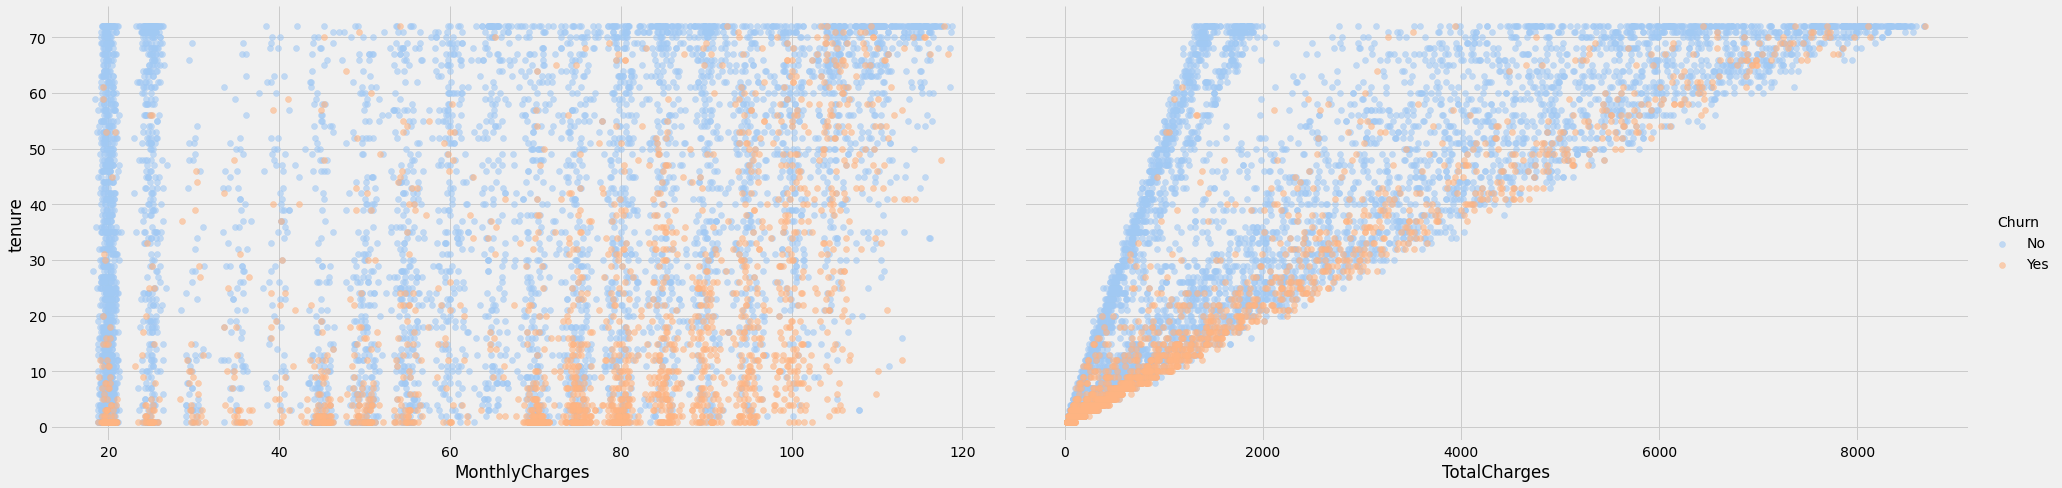

In [56]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"],palette="pastel", height=7, hue="Churn", aspect=2)
ax = g.map(plt.scatter, alpha=0.6)
g.add_legend()

**OUTLIER ANALYSIS**

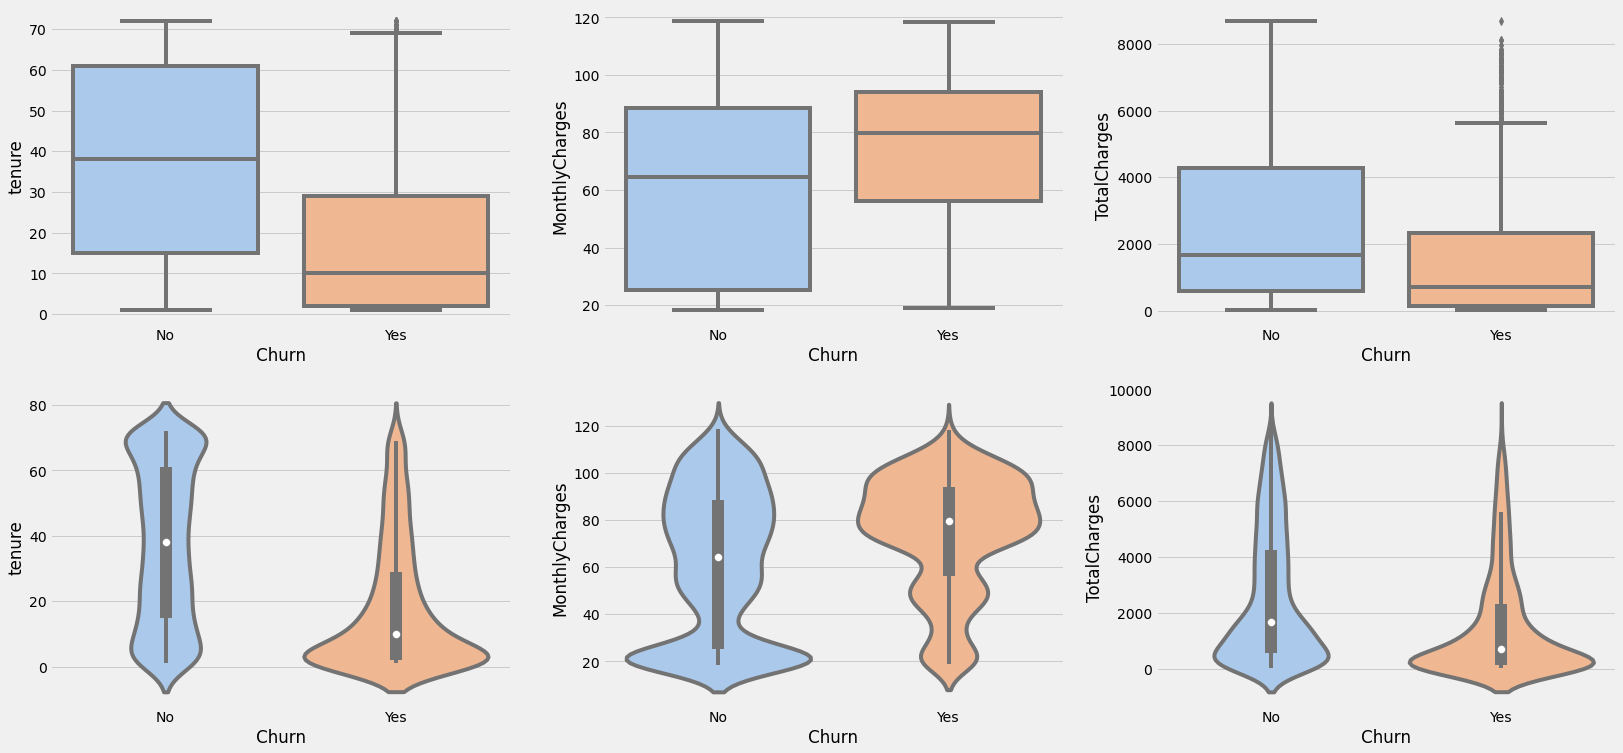

In [57]:
fig, axes = plt.subplots(2,3,figsize = (25,12))
sns.boxplot(y="tenure",x="Churn", data = df, palette="pastel", ax=axes[0,0])
sns.boxplot(y="MonthlyCharges",x="Churn",data = df, palette="pastel",ax=axes[0,1])
sns.boxplot(y="TotalCharges",x="Churn",data = df, palette="pastel",ax=axes[0,2])
sns.violinplot(y="tenure",x="Churn",data = df, palette="pastel", ax=axes[1,0])
sns.violinplot(y="MonthlyCharges",x="Churn",data = df, palette="pastel",ax=axes[1,1])
sns.violinplot(y="TotalCharges",x="Churn",data = df, palette="pastel",ax=axes[1,2])
plt.show(fig)


# Feature Engineering

In [58]:
df.drop("customerID",axis=1, inplace=True)

In [59]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
df['AdditionalServices'] = (df[['OnlineSecurity','OnlineBackup' ,'DeviceProtection', 'TechSupport', 'StreamingMovies', 'StreamingTV']] == 'Yes').sum(axis=1)

In [61]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AdditionalServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


# Encoding

In [62]:
onehotencoding=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

In [63]:
df = pd.get_dummies(df, columns=onehotencoding)

In [64]:
labelencoding = ['gender', 'Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

In [65]:
label_encoder = LabelEncoder()

In [66]:
for i in labelencoding:
   df[i]=label_encoder.fit_transform(df[i])


In [67]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [68]:
for i in df.columns:
   print(i,"   ",df[i].unique())

gender     [0 1]
SeniorCitizen     [0 1]
Partner     [1 0]
Dependents     [0 1]
tenure     [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService     [0 1]
PaperlessBilling     [1 0]
MonthlyCharges     [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges     [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn     [0 1]
AdditionalServices     [1 2 3 0 4 5 6]
MultipleLines_No     [0 1]
MultipleLines_No phone service     [1 0]
MultipleLines_Yes     [0 1]
InternetService_DSL     [1 0]
InternetService_Fiber optic     [0 1]
InternetService_No     [0 1]
OnlineSecurity_No     [1 0]
OnlineSecurity_No internet service     [0 1]
OnlineSecurity_Yes     [0 1]
OnlineBackup_No     [0 1]
OnlineBackup_No internet service     [0 1]
OnlineBackup_Yes     [1 0]
DeviceProtection_No     [1 0]
DeviceProtection_No internet se

# Scaling

In [69]:
features_mms = ['tenure', 'MonthlyCharges', 'TotalCharges',"AdditionalServices"]
df_features_mms = pd.DataFrame(df, columns=features_mms)
df_remaining_features = df.drop(columns=features_mms)

Scaler = StandardScaler()
rescaled_features = Scaler.fit_transform(df_features_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=df_remaining_features.index)

df = pd.concat([df_remaining_features, df_rescaled_features], axis=1)


In [70]:
df.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService                               0.011691
gender                                    -0.008545
MultipleLines_No phone service            -0.011691
MultipleLine

# Classification

In [71]:
X = df.drop(columns = ['Churn']).values
y = df['Churn'].values

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 123, stratify=y)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report,roc_auc_score
from statsmodels.tools.eval_measures import mse, rmse

from sklearn.model_selection import GridSearchCV

In [74]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [93]:
param_grid_knn = {'n_neighbors': np.arange(1, 25)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid_knn, cv=2,n_jobs=-1,verbose=3,refit=True)
knn_cv.fit(X_train, y_train)

y_pred_knn = knn_cv.predict(X_test)
y_pred_prob_knn = knn_cv.predict_proba(X_test)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


KNN best params: {'n_neighbors': 18}
KNN Accuracy Score (Test): 0.7839374555792467
KNN Accuracy Score (Training): 0.8104888888888889
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



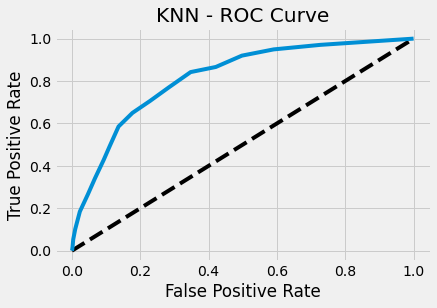

AUC Score (ROC): 0.8160476986711256



In [94]:
print('KNN best params:', knn_cv.best_params_)
print('KNN Accuracy Score (Test):', accuracy_score(y_test,y_pred_knn))
print('KNN Accuracy Score (Training):', knn_cv.score(X_train , y_train))
print(classification_report(y_test,y_pred_knn))
roc_curve_auc_score(X_test, y_test, y_pred_prob_knn, 'KNN')

In [77]:
# param_grid_rf = {'n_estimators': np.arange(500, 2000, 50), 
#                  'max_features': ['auto', 'sqrt'],
#                  'max_depth': np.arange(10, 220, 30),
#                  'criterion': ['gini', 'entropy'],}

# rf = RandomForestClassifier()
# rf_random_grid = GridSearchCV(rf,param_grid_rf, cv=2,n_jobs=-1,verbose=3,refit=True)
# rf_random_grid.fit(X_train, y_train)

# y_pred_rf_tuned = rf_random_grid.predict(X_test)
# y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

In [78]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)


Random Forest Accuracy Score (Test): 0.7846481876332623
Random Forest Accuracy Score (Training): 0.9973333333333333
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.71      1407
weighted avg       0.77      0.78      0.78      1407



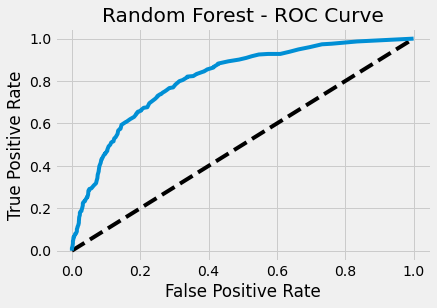

AUC Score (ROC): 0.8097385218278106



In [95]:
print('Random Forest Accuracy Score (Test):', accuracy_score(y_test,y_pred_rf))
print('Random Forest Accuracy Score (Training):', rf.score(X_train , y_train))
print(classification_report(y_test,y_pred_rf))
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')

In [80]:
param_grid = {'max_depth' : [3, 5, 7],'n_estimators': [60, 100, 140],'learning_rate': [0.01, 0.1]}

xgb = XGBClassifier()
xgb_grid=GridSearchCV(xgb,param_grid=param_grid, cv=2,n_jobs=-1,verbose=3,refit=True)
xgb_grid.fit(X_train, y_train)

y_pred_xgb = xgb_grid.predict(X_test)
y_pred_prob_xgb = xgb_grid.predict_proba(X_test)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 60}
XGBoost Accuracy Score (Test): 0.7960199004975125
XGBoost Accuracy Score (Training): 0.8380444444444445
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.54      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



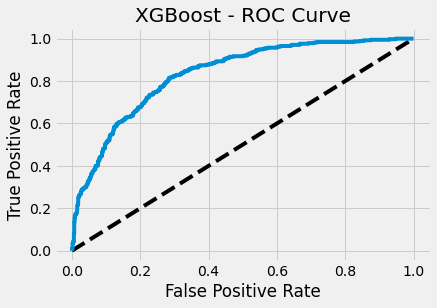

AUC Score (ROC): 0.8326638056437042



In [98]:
print('XGBoost Best Parameters:', xgb_grid.best_params_)
print('XGBoost Accuracy Score (Test):', accuracy_score(y_test,y_pred_xgb))
print('XGBoost Accuracy Score (Training):', xgb_grid.score(X_train , y_train))
print(classification_report(y_test,y_pred_xgb))
roc_curve_auc_score(X_test, y_test, y_pred_prob_xgb, 'XGBoost')

In [97]:
classmethods = ["KNN","Random Forest","XGBoost"]

accuracyvalues = [accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_xgb)]

fig = px.bar(x=classmethods, y=accuracyvalues, color=classmethods,text=accuracyvalues,
             title="Accuracy Values of The Classification Methods")

fig.show()